# Email Spam and Malware Filtering

# Environment

# Dependencies

In [5]:
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score,accuracy_score
from sklearn import model_selection, preprocessing,svm,metrics
import seaborn as sn
%matplotlib inline

# Table of Contents

# Loading Data

In [13]:
loc = '/home/codersarts/Desktop/data/spam.csv'
raw_data = pd.read_csv(loc,engine='python')
data = pd.DataFrame()
data['target'] = raw_data['v1']
data['text'] = raw_data['v2']
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
ham = [i for i in data['target'] if i == 'ham']
spam = [i for i in data['target'] if i == 'spam']
len(ham),len(spam)

(4825, 747)

In [18]:
data['target'] = data['target'].map({'ham': 0, 'spam': 1})
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

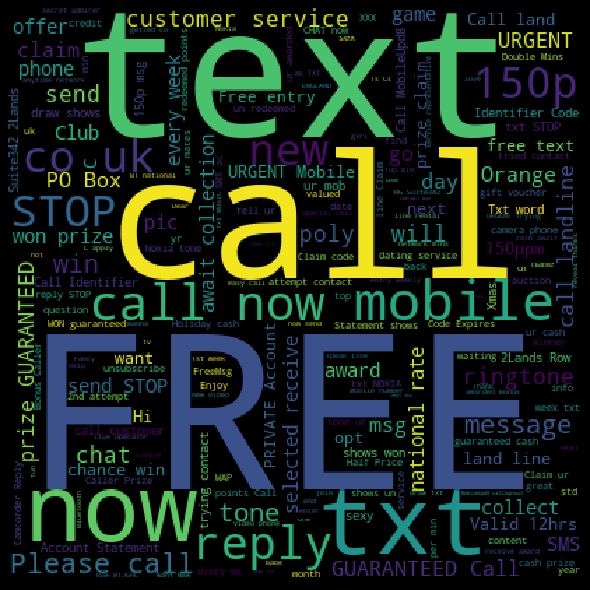

In [21]:
spam_words = ' '.join(list(data[data['target'] == 1]['text']))
spam_wc = WordCloud(width = 412,height = 412).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

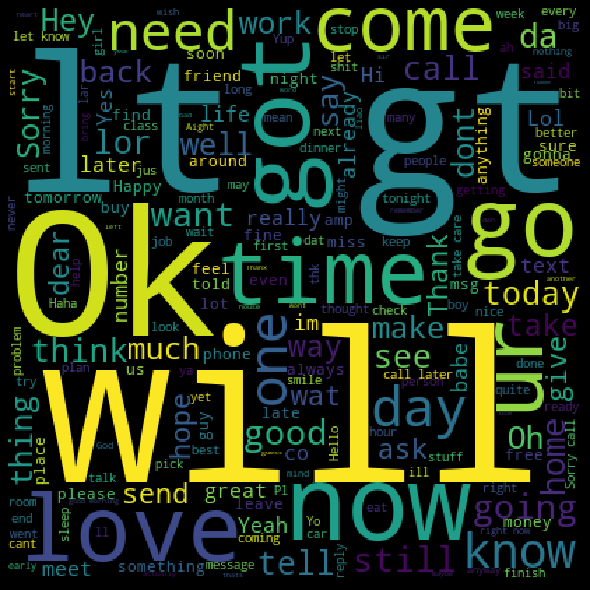

In [22]:
ham_words = ' '.join(list(data[data['target'] == 0]['text']))
ham_wc = WordCloud(width = 412,height = 412).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Train Test Split

In [37]:
data.replace(r'\b\w{1,4}\b','', regex =True, inplace = True)
vectorizer = CountVectorizer()
vectorizer.fit(data['text'])
vec = vectorizer.transform(data['text'])
data['encoded_text'] = vec
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(vec,data['target'],test_size=0.3)
data.head()

,target,text,encoded_text
0,0,"until jurong point, crazy.. Available bugis...","(0, 682)\t1\n (0, 857)\t1\n (0, 1166)\t1\n..."
1,0,... Joking ...,"(0, 682)\t1\n (0, 857)\t1\n (0, 1166)\t1\n..."
2,1,entry final . 87121 receive e...,"(0, 682)\t1\n (0, 857)\t1\n (0, 1166)\t1\n..."
3,0,early ... already ...,"(0, 682)\t1\n (0, 857)\t1\n (0, 1166)\t1\n..."
4,0,"' think , lives around though","(0, 682)\t1\n (0, 857)\t1\n (0, 1166)\t1\n..."


# Training Model & Predictions

In [38]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X , Train_Y)
predictions_SVM = SVM.predict(Test_X)

# Evaluation

In [39]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print(classification_report(Test_Y,predictions_SVM))
print(f1_score(Test_Y,predictions_SVM, average='weighted'))

SVM Accuracy Score ->  97.42822966507177
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1452
           1       0.99      0.81      0.89       220

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

0.9732020878647311


# Visualize Results

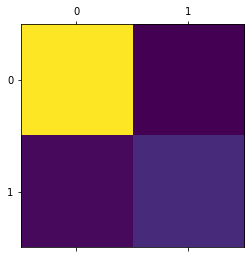

In [40]:
cm=metrics.confusion_matrix(Test_Y,predictions_SVM)
plt.matshow(cm)

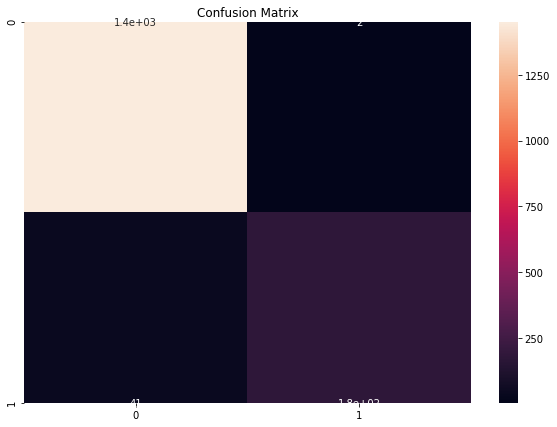

In [41]:
plt.figure(figsize = (10,7))
ax= plt.subplot()
ax.set_title('Confusion Matrix'); 
sn.heatmap(cm, annot=True,ax = ax)

In [52]:
df = pd.DataFrame(Test_Y)
df['pred'] = predictions_SVM
sent = df['target']
pred = df['pred']
ham= len([i for i in df['pred'] if i ==0])
spam = len([i for i in df['pred'] if i ==1])

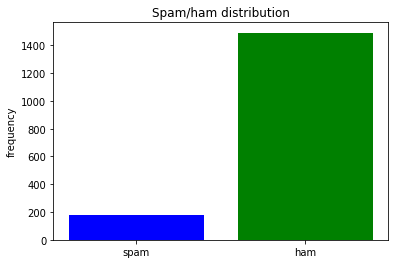

In [48]:
plt.title('Spam/ham distribution')
cat = ['spam', 'ham']
freq = [spam,ham]
plt.ylabel('frequency')
plt.bar(cat,freq,color= ['blue','green'])

plt.show()

The bar graph above clearly shows the Spam/ham relationsip.The model was validated on 1672 messages out of which 181 were predicted spam and 1491 were predicted ham.

In [55]:
ham


1491